In [1]:
%matplotlib ipympl
from skimage import io as skio
import matplotlib.pyplot as plt
url = 'batch/France/105.jpg'
# url = 'batch/A_curious_herbal/2.jpg'
img = skio.imread(url)

In [2]:
plt.figure()
skio.imshow(img)
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

A Jupyter Widget

shape of image: (760, 543, 3)
dtype of image: uint8


In [3]:
from skimage import color
grey = color.rgb2grey(img)
plt.figure()
skio.imshow(grey,cmap=plt.cm.gray)

A Jupyter Widget

In [4]:
from skimage import filters
sobel = filters.sobel(grey)
plt.figure()
skio.imshow(sobel)

A Jupyter Widget

In [45]:
skio.imsave("sobel.png",sobel,cmap=plt.cm.gray)

C:\Users\yeshu\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [5]:
from skimage import feature
edges1 = feature.canny(grey)
edges2 = feature.canny(grey, sigma=2)
plt.figure()
skio.imshow(edges1)
plt.figure()
skio.imshow(edges2)
# plt.imsave("t.jpg",edges2,cmap=plt.cm.gray_r)

A Jupyter Widget

A Jupyter Widget

In [56]:
grey

array([[ 0.79827373,  0.80611686,  0.81003843, ...,  0.76614745,
         0.75046118,  0.72495961],
       [ 0.79435216,  0.79827373,  0.80611686, ...,  0.77791216,
         0.76222588,  0.74064588],
       [ 0.78650902,  0.79435216,  0.80219529, ...,  0.77988431,
         0.76614745,  0.75046118],
       ..., 
       [ 0.77474431,  0.79043059,  0.80611686, ...,  0.80093647,
         0.78917176,  0.7824298 ],
       [ 0.77866588,  0.79435216,  0.81003843, ...,  0.79309333,
         0.7801898 ,  0.77458667],
       [ 0.79435216,  0.80611686,  0.82180314, ...,  0.7852502 ,
         0.77234667,  0.76674353]])

In [6]:
import numpy as np
markers = np.zeros_like(grey)
markers[grey < 0.6] = 2 #黑色部分
markers[grey > 0.9] = 1 #白色部分
plt.figure()
skio.imshow(markers)

A Jupyter Widget

C:\Users\yeshu\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


<IPython.core.display.Javascript object>


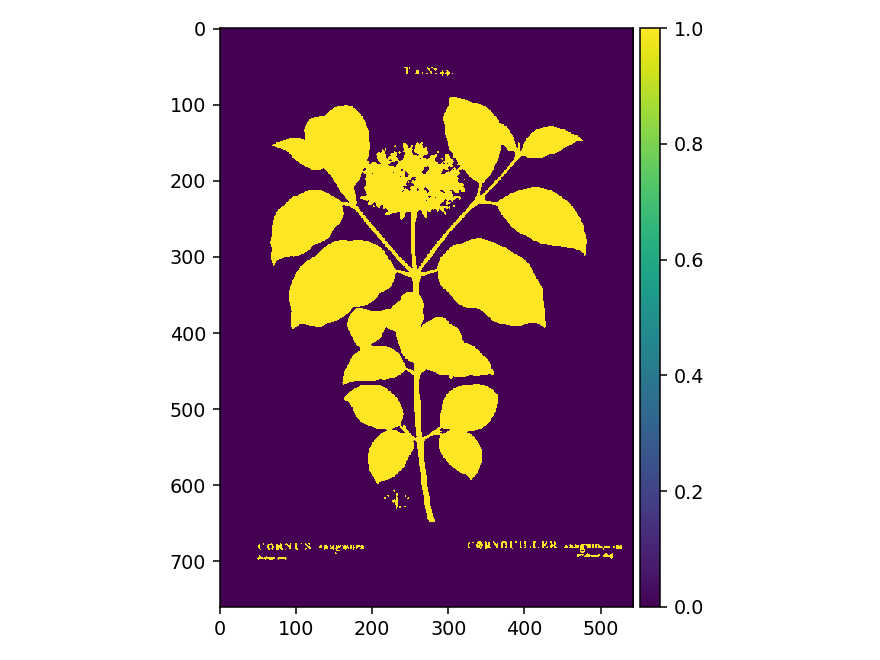

C:\Users\yeshu\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
from skimage.morphology import watershed
segmentation = watershed(sobel, markers)
plt.figure()
skio.imshow(segmentation-1)
segmentation-1

<IPython.core.display.Javascript object>


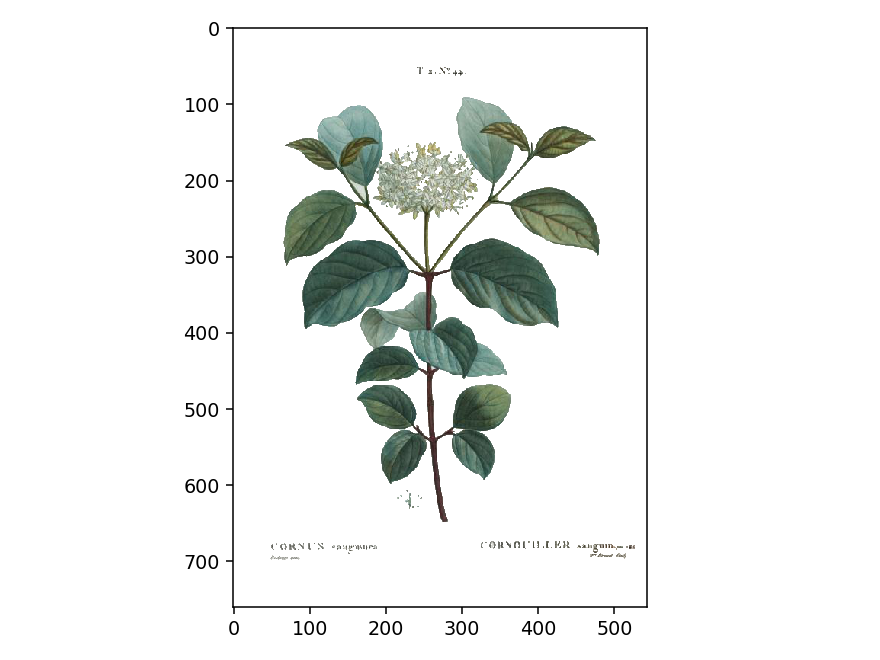

array([[[206, 204, 192,   0],
        [208, 206, 194,   0],
        [209, 207, 195,   0],
        ..., 
        [218, 191, 172,   0],
        [214, 187, 168,   0],
        [209, 180, 162,   0]],

       [[205, 203, 191,   0],
        [206, 204, 192,   0],
        [208, 206, 194,   0],
        ..., 
        [221, 194, 175,   0],
        [217, 190, 171,   0],
        [213, 184, 166,   0]],

       [[203, 201, 189,   0],
        [205, 203, 191,   0],
        [207, 205, 193,   0],
        ..., 
        [220, 195, 175,   0],
        [218, 191, 172,   0],
        [214, 187, 168,   0]],

       ..., 
       [[200, 198, 186,   0],
        [204, 202, 190,   0],
        [208, 206, 194,   0],
        ..., 
        [220, 202, 180,   0],
        [217, 199, 177,   0],
        [217, 197, 173,   0]],

       [[201, 199, 187,   0],
        [205, 203, 191,   0],
        [209, 207, 195,   0],
        ..., 
        [218, 200, 178,   0],
        [217, 196, 175,   0],
        [215, 195, 171,   0]],

       

In [67]:
import numpy as np
img2 = np.dstack((img,(segmentation-1).astype(np.uint8)*255))
plt.figure()
skio.imshow(img2)
# skio.imsave("t2223.png",img2,)
img2

<IPython.core.display.Javascript object>


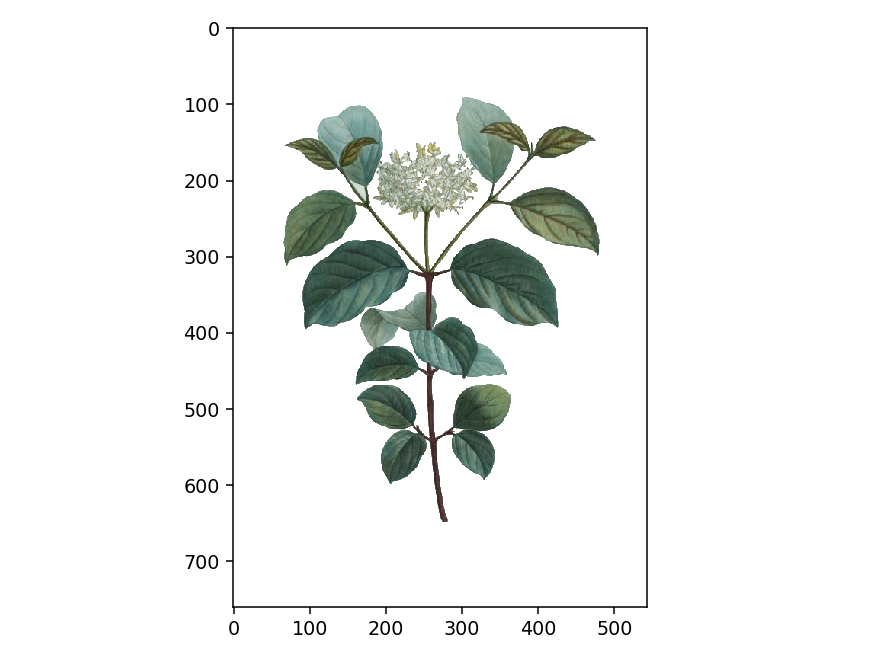

In [68]:
from scipy import ndimage as ndi
from skimage import measure
label_objects = measure.label(segmentation-1)
sizes = np.bincount(label_objects.ravel())
sizes[0]=0
mask_sizes = sizes == max(sizes)
# np.shape(label_objects)
# plt.figure()
(mask_sizes[label_objects]).astype(np.uint8)
img2 = np.dstack((img,(mask_sizes[label_objects]).astype(np.uint8)*255))
plt.figure()
skio.imshow(img2)

In [51]:
mask_sizes

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=bool)

In [52]:
def bbox1(img):
    a = np.where(img != 0)
    bbox = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
    return bbox

In [53]:
a,b,c,d=bbox1((mask_sizes[label_objects]).astype(np.uint8))


<IPython.core.display.Javascript object>


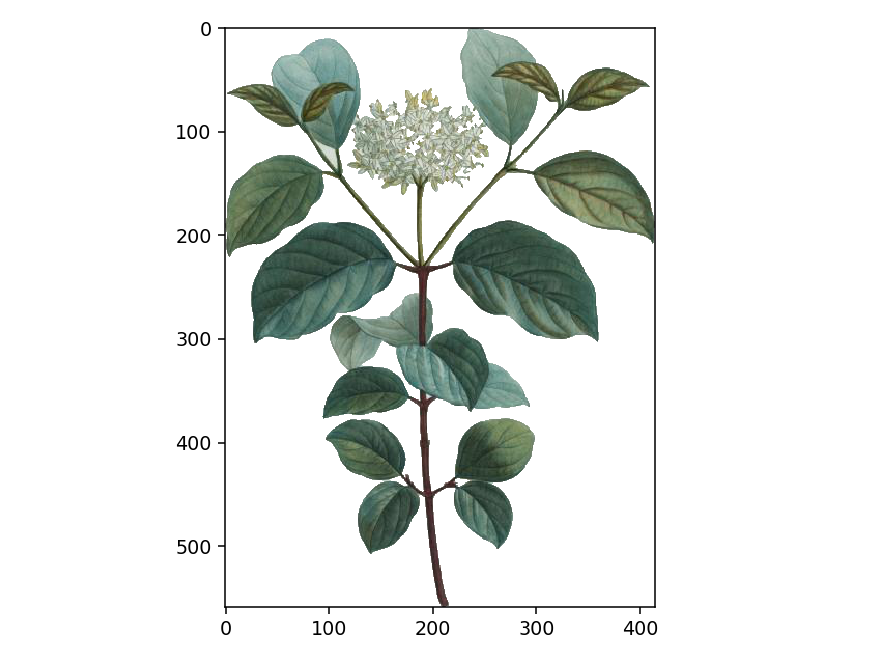

In [69]:
plt.figure()
skio.imshow(img2[a:b+1,c:d+1])